In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [2]:
# Load the dataset
data = pd.read_csv('technology_product_sales_data.csv')

In [3]:
data.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [5]:
# Drop unnecessary columns
data = data.drop(columns=['ProductID'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductCategory       9000 non-null   object 
 1   ProductBrand          9000 non-null   object 
 2   ProductPrice          9000 non-null   float64
 3   CustomerAge           9000 non-null   int64  
 4   CustomerGender        9000 non-null   int64  
 5   PurchaseFrequency     9000 non-null   int64  
 6   CustomerSatisfaction  9000 non-null   int64  
 7   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 562.6+ KB


In [7]:
data.isnull().sum()

ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [9]:
print(data['ProductCategory'].unique())
print(data['ProductBrand'].unique())

['Smartphones' 'Smart Watches' 'Tablets' 'Laptops' 'Headphones']
['Other Brands' 'Samsung' 'Sony' 'HP' 'Apple']


In [10]:
d = data.copy()

In [11]:
#Encoding of the categorical Values
data['ProductCategory'] = data['ProductCategory'].map({"Smartphones":0, 'Smart Watches':1,
                                       'Tablets':2,'Laptops':3,  'Headphones':4   })
data['ProductBrand'] = data['ProductBrand'].map({'Samsung':0, 'HP':1, 'Apple':2, 'Other Brands':3,'Sony':4})

In [12]:
data.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,0,3,312.949668,18,0,2,1,0
1,1,0,980.389404,35,1,7,2,1
2,2,0,2606.718293,63,0,1,5,1
3,0,0,870.395450,63,1,10,3,1
4,2,4,1798.955875,57,0,17,3,0


<Axes: >

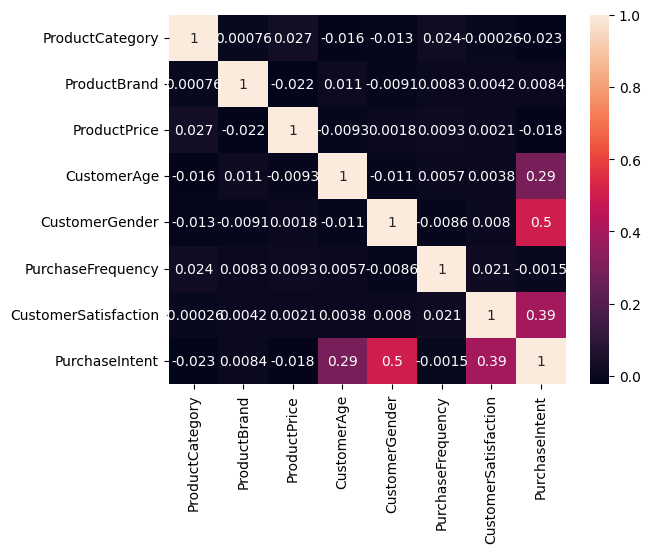

In [13]:
sns.heatmap(data.corr(), annot=True)

In [14]:
# spliting Data into Dependent  and independent variables 
X = data.drop(columns=["PurchaseIntent"])
y =data['PurchaseIntent']

In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=.2,random_state=1000 )

In [16]:

#Using Logistic Regression Model
model = LogisticRegression(max_iter=10000)
model = model.fit(X_train,y_train)


In [17]:
data.isnull().sum()

ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [18]:
#predictions 
y_pred = model.predict(X_test)

In [21]:
print(confusion_matrix(y_pred,y_test))
print(round(accuracy_score(y_pred,y_test)*100,2))

[[613 106]
 [126 955]]
87.11


# Using XGBClassfier Model 

The accuracy of the model above can't be improved further even after several parameter tunning and features selections. Now I will be using
the XGBClassifier model if there will be an improvement 

In [23]:
X_tran, X_tst,y_tran,y_tst = train_test_split(X,y, test_size=0.2,random_state=1000)
model_ = xgb.XGBClassifier()
model_.fit(X_tran,y_tran)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
pred = model_.predict(X_tst)

In [32]:
print(f"{round(accuracy_score(y_tst, pred)*100,2)}% ")

94.89% 
